# Latent Variable Model

## Mixture Gaussian Model

In reality, there are many situations where the distributions of observed data are more than just the normal distribution. 
For example, in the previous height data, if we focus on gender (male and female), we can observe two different distributions mixing up together, as shown in the following figure. 

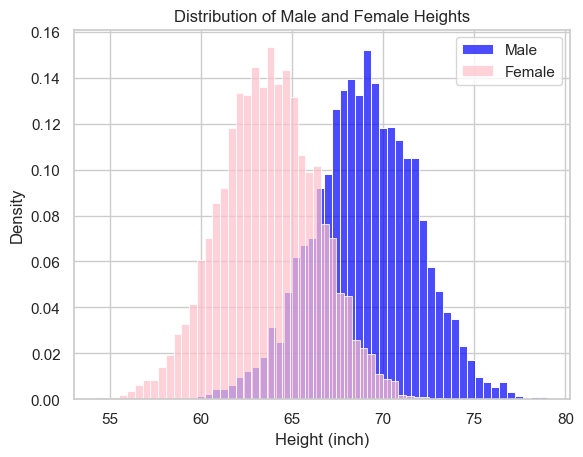

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

df = pd.read_csv("./data/Weight-Height/weight-height.csv")
data = df["Height"]

sns.set(style='whitegrid', palette='pastel')

# Create histograms for male and female heights
ax = sns.histplot(data=df[df['Gender'] == 'Male'], x='Height', bins='auto', color='blue', alpha=0.7, stat='density', label='Male')
sns.histplot(data=df[df['Gender'] == 'Female'], x='Height', bins='auto', color='pink', alpha=0.7, stat='density', label='Female')

# Set labels and title
ax.set_xlabel("Height (inch)")
ax.set_ylabel("Density")
ax.set_title("Distribution of Male and Female Heights")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

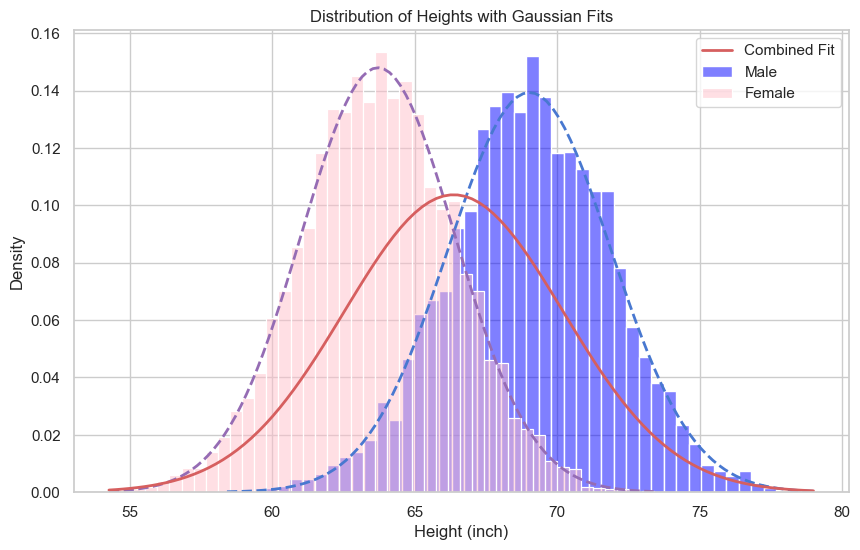

In [2]:
sns.set(style='whitegrid', palette='muted')

# Prepare the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram and fit for males
male_heights = df[df['Gender'] == 'Male']['Height']
sns.histplot(male_heights, bins='auto', color='blue', alpha=0.5, stat='density', label='Male', ax=ax)
mu_male, sigma_male = norm.fit(male_heights)
x_male = np.linspace(male_heights.min(), male_heights.max(), 100)
pdf_male = norm.pdf(x_male, mu_male, sigma_male)
plt.plot(x_male, pdf_male, 'b--', linewidth=2)

# Histogram and fit for females
female_heights = df[df['Gender'] == 'Female']['Height']
sns.histplot(female_heights, bins='auto', color='pink', alpha=0.5, stat='density', label='Female', ax=ax)
mu_female, sigma_female = norm.fit(female_heights)
x_female = np.linspace(female_heights.min(), female_heights.max(), 100)
pdf_female = norm.pdf(x_female, mu_female, sigma_female)
plt.plot(x_female, pdf_female, 'm--', linewidth=2)

# Combine the data and plot overall fit
combined_heights = pd.concat([male_heights, female_heights])
mu_combined, sigma_combined = norm.fit(combined_heights)
x_combined = np.linspace(combined_heights.min(), combined_heights.max(), 100)
pdf_combined = norm.pdf(x_combined, mu_combined, sigma_combined)
plt.plot(x_combined, pdf_combined, 'r-', linewidth=2, label='Combined Fit')

ax.set_xlabel("Height (inch)")
ax.set_ylabel("Density")
ax.set_title("Distribution of Heights with Gaussian Fits")

plt.legend()
plt.show()

In such a case, to have a better modeling performance, instead of having one normal distribution as the model, it is better to assume that the data distribution is a mixture of two normal distributions, each for females and males, as the following equation.

$$\begin{align*}
p(x) &= p( \text{Female})~p(x| \text{Female}) + p( \text{Male})~p(x| \text{Male}) \\
&= \phi_f\mathcal{N}(x; \mu_{f}, \sigma_{f}) + \phi_{m}\mathcal{N}(x; \mu_{m}, \sigma_{m})
\end{align*} $$

## Latent Variable Model

As in the previous example, besides the observable variable $x$ (height data in the last example), the variable $z$ that cannot be directly observed is called ***Latent Variable*** (gender information in the example). 
The model considering such latent variables in the modeling processes is called the ***Latent Variable Model***. 

The **Gaussian Mixture Model** (GMM) and the **Variational Autoencoder** (VAE) are familiar latent variable models. 

The basic concepts of latent variable models are as follows.

- Behind observed data, there are "latent variables" that cannot be observed directly
- Latent variables influence observed data (observed variables)
- A "generative model with latent variables "models the generation process by which observed variables are generated from latent variables

$$
\begin{align*}
p_\theta(x) &= \sum_z p_\theta(x, z) \\
&= \sum_z q_\phi(z)p_\theta(x|z)
\end{align*}
$$

## Parameter Estimation

Consider a latent variable model with $x$ as the observed variable and $z$ as the latent variable. The log-likelihood function of the observed variable can be written as the margin of $p_\theta(x,z)$, where $\theta$ is the model parameter. 
Then, with the observed data (samples) $\mathcal{D}=\{x^{(1)}, x^{(2)}, ..., x^{(N)}\}$, the log-likelihood function of this model can be expressed as the following.

$$\begin{align*}
\log{p_\theta(\mathcal{D})} &= \log{\left(p_\theta(x^{(1)})p_\theta(x^{(2)})\cdots p_\theta(x^{(N)})\right)} \\
&= \sum_{n=1}^{N}\log{p_\theta(x^{(n)})} \\
&= \sum_{n=1}^{N}\log{\sum_{z^{(n)}}p_\theta(x^{(n)}, z^{(n)})} 
\end{align*}$$

For parameter estimation, our objective is to maximize the log-likelihood function. 
Unfortunately, this function often presents itself in a "log-sum" form, making it analytically intractable. 
A common approach to address this challenge is the **Expectation-Maximization** (**EM**) algorithm, which introduces a "sum-log" form, facilitating easier computations for parameter estimation.

This note will not delve into the detailed mechanics of the EM algorithm, but will provide a succinct overview. 
In the EM algorithm, rather than maximizing the log-likelihood function directly, we optimize its lower bound. 
This algorithm is a robust statistical tool designed to compute maximum likelihood estimates of parameters in probabilistic models, particularly when these models include unobserved latent variables. 
It proves especially beneficial in cases where the dataset is incomplete or contains missing elements.

Before exploring the EM algorithm further, we must first convert the log-likelihood function from the "log-sum" to the "sum-log" form. 
This conversion involves introducing an auxiliary distribution, $q(z)$, which can be any distribution, and applying a clever mathematical approximation to facilitate the transformation.

$$\begin{align*}
\log p_\theta(x) &= \log\frac{p_\theta(x, z)}{p_\theta(z|x)} \\
&= \log\frac{p_\theta(x, z)}{p_\theta(z|x)} \frac{q(z)}{q(z)}\\
&=\log\frac{p_\theta(x, z)}{q(z)} +\log\frac{q(z)}{p_\theta(z|x)}\\
\end{align*}$$

```{margin}

```{margin}
The Kullback-Leibler (KL) divergence is a measure of how one probability distribution diverges from a second, reference probability distribution. It's a key concept in statistics, information theory, and machine learning, particularly in scenarios where we need to measure the difference or 'distance' between two distributions.

The KL divergence is mathematically expressed as follows:

For discrete distributions:

$$ D_{KL}(P \parallel Q) = \sum_{x} P(x) \log \left(\frac{P(x)}{Q(x)}\right) $$

For continuous distributions:

$$ D_{KL}(P \parallel Q) = \int P(x) \log \left(\frac{P(x)}{Q(x)}\right) dx $$

where $ P $ and $ Q $ are the two probability distributions being compared. 
Here, $ P(x) $ is the probability of event $ x $ under distribution $P$, and $ Q(x) $ is the probability of event $ x $ under distribution $ Q $.

It's important to note that KL divergence is not symmetric, meaning $ D_{KL}(P \parallel Q) \neq D_{KL}(Q \parallel P) $. This property signifies that it's not a true metric of distance in a geometrical sense but rather a measure of how one distribution is different from another in terms of information loss when $Q$ is used to approximate $P$.

```

Next, we will show that the second term of this log-likelihood function is equivalent to the ***KL divergence*** ($D_{\text{KL}}$) between the distribution $q(z)$ that we have just introduced and the $p_\theta({z|x})$.

Since $\sum_z q(z) = 1$, we can express the log-likelihood function as the following.

$$\begin{align*}
\log p_\theta(x) &= \log p_\theta(x)\sum_zq(z) \\ &=\sum_{z}q(z)p_\theta(x) \\
&=\sum_{z}q(z)\left(\log\frac{p_\theta(x, z)}{q(z)} +\log\frac{q(z)}{p_\theta(z|x)}\right) \\
&=\sum_{z}q(z)\log\frac{p_\theta(x, z)}{q(z)} +\sum_{z}q(z)\log\frac{q(z)}{p_\theta(z|x)}\\
&=\sum_{z}q(z)\log\frac{p_\theta(x, z)}{q(z)} + D_{\text{KL}}(q(z)\| p_\theta(z|x))
\end{align*}$$

As $D_{\text{KL}}(q(z)\| p_\theta(z|x)) \geq 0$, we can obtain the lower bound of log-likelihood function as the following.

$$\log p_\theta(x) \geq \sum_{z}q(z)\log\frac{p_\theta(x, z)}{q(z)}$$

This lower bound is called the Evidence Lower Bound (ELBO). 

$${\text{ELBO}(x;q, \theta)} = \sum_{z}q(z)\log\frac{p_\theta(x, z)}{q(z)}$$

## EM Algorithm

The log-likelihood is always greater than or equal to the Evidence Lower Bound (ELBO). Therefore, incrementing the ELBO in the direction of maximization also contributes to increasing the log-likelihood function. Additionally, as the Kullback-Leibler divergence $D_{\text{KL}}(q(z) \| p_\theta(z|x))$ approaches zero—the minimum value—it does so when $q(z) = p_\theta(z|x)$. Consequently, the EM algorithm can iteratively estimate the model parameters that maximize the log-likelihood by following these steps:

```{admonition} EM Algorithm
**E-step**: Update $\{q^{(1)}, q^{(2)}, ..., q^{(N)}\}$  with fixed $\theta$

For each sample $x^{(n)}$ , update $q^{(n)}$ with $q^{(n)} = p_\theta(z|x^{(n)})$ 


**M-step**: Update $\theta$ with fixed $\{q^{(1)}, q^{(2)}, ..., q^{(N)}\}$

Analytically obtain $\theta$ with $\theta = \arg\max_\theta\sum_{n=1}^{N}{\text{ELBO}(x^{(n)};q^{(n)}, \theta)}$ 


**Completion Judgment**: Compare the log-likelihood of the current iteration with the previous iteration. Stop the algorithm when predefined conditions are met.
```

### A Brief Explanation of the E Step and M Step

**Expectation (E) Step:** This step involves calculating the expected value of the log-likelihood function with respect to the conditional distribution of the latent variables given the observed data and the current parameter estimates. It estimates the "hidden" or unobserved data that maximize the likelihood function under the assumption of current parameter values. The concept of this step is illustrated in the figure below.

![ELBO-KL](../figures/chapter2/elbo-kl.png)

As depicted in the figure, the smaller the Kullback-Leibler divergence ($D_{KL}$), the higher the Evidence Lower Bound (ELBO). When $D_{KL}$ reaches zero, the log-likelihood can be fully expressed in terms of the ELBO. Additionally, $D_{KL}$ is zero when the two distributions coincide, indicating that if we can select $q$ to match $p_\theta$, then $D_{KL}$ will become zero. Consequently, using $p_\theta$ as the update formula for $q$ brings us closer to the optimal solution.

**Maximization (M) Step:** In this step, maximize the expected log-likelihood calculated in the E step to update the parameter estimates. It involves computing parameters that maximize the likelihood of the observed data, assuming the estimated hidden data from the E step is accurate.

This process is repeated with the updated parameters until the changes in the parameter estimates become negligible, indicating convergence. The EM algorithm is extensively used in various applications such as clustering in machine learning, parameter estimation in hidden Markov models, and more.

The iterative nature of the EM algorithm enables it to refine its estimates progressively, effectively managing the complexities introduced by the latent variables.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

# Generate some dummy data
np.random.seed(42)
data = np.concatenate([
    np.random.normal(-2, 1, 300),
    np.random.normal(2, 1, 300)
])
data = data.reshape(-1, 1)  # Reshape to fit our needs

# Number of components
K = 2

# Initialize parameters
means = np.array([1, 2], dtype=np.float64)  # Initial guesses for means
covariances = np.array([1.5, 1.5], dtype=np.float64)  # Initial guesses for variances
weights = np.array([0.5, 0.5], dtype=np.float64)  # Initial guesses for mixing coefficients

# Plotting setup
fig, ax = plt.subplots()
x = np.linspace(-6, 6, 1000)

def update(frame):
    global means, covariances, weights

    # E-step: Calculate responsibilities
    responsibilities = np.zeros((data.shape[0], K))
    for k in range(K):
        likelihood = np.exp(-0.5 * ((data - means[k])**2) / covariances[k]) / np.sqrt(2 * np.pi * covariances[k])
        responsibilities[:, k] = weights[k] * likelihood.ravel()
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    # M-step: Update parameters
    Nk = responsibilities.sum(axis=0)
    weights = Nk / Nk.sum()
    means = (data.T @ responsibilities / Nk).ravel()
    covariances = np.array([(responsibilities[:, k] * (data.flatten() - means[k])**2).sum() / Nk[k] for k in range(K)])

    # Clear the plot and replot the data histogram
    ax.clear()
    sns.histplot(data.ravel(), bins=30, kde=False, color="gray", ax=ax, stat='density')
    
    # Plotting each component
    for k in range(K):
        pdf = weights[k] * np.exp(-(x - means[k])**2 / (2 * covariances[k])) / np.sqrt(2 * np.pi * covariances[k])
        ax.plot(x, pdf, label=f'Component {k+1}')
    
    ax.set_xlim(-6, 6)
    ax.set_ylim(0, 0.3)
    ax.legend()
    ax.set_title(f'EM Iteration: {frame + 1}')

ani = FuncAnimation(fig, update, frames=20, repeat=False)
plt.close(fig)  # Prevent display of static plot

# Render the animation as HTML
html_str = ani.to_jshtml()
display(HTML(html_str))

In [4]:
# Output estimated parameters
print("Estimated means:", means)
print("Estimated variances:", covariances)
print("Estimated weights:", weights)

Estimated means: [-2.04542867  1.94782258]
Estimated variances: [0.87703219 0.97411071]
Estimated weights: [0.49116415 0.50883585]
